EXERCISE 1 - GLYCERINE

In [1]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define a linear model function
def f(x, a, b):
    return (a*x + b)
#define the velocity correction function
def vcorr(v, r, D):
    return v/(1-(2.104*(2*r/D))+(2.089*((2*r/D)**2)))
#define the function for the glycerine terminl velocity
def vglycerine(r, a, b):
    return a*(r**2) + b
#define reduced chi-squared function
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    chi = np.sum(((yi-vglycerine(xi, m, b))**2)/(sigma_i**2))
    chi = chi/v
    return chi

In [3]:
#define varibles to run through the columns in the csv file
col1 = 0
col2 = 1
#define 2D arrays for position and time from the csv files
xdata_g = np.zeros((16, 479))
ydata_g = np.zeros((16, 479))

#run through the rows and columns and store the data in the 2D arrays
for i in range(0,15):
    x, y = np.loadtxt("glycerine data.csv", skiprows = 0, usecols = (col1, col2), delimiter = ',', unpack = True)
    for j in range(0, 83):
        xdata_g[i][j] = x[j]
    for k in range(0, 83):
        ydata_g[i][k] = y[k]
    col1+=2
    col2+=2   

In [4]:
#import the radii and radius errors
radii_w, radii_g, r_err = np.loadtxt("bead radii.csv", skiprows = 0, delimiter = ',', unpack = True)

In [5]:
#define position and time errors
position_err = 0.001
time_err = 0.01
#create an array to store the m_opts of each pair of columns in the 2D arrays above
slopes = np.zeros(15)
#error in the m_opts
slopes_err = np.zeros(15)
#create array to store the optimal intercepts from the curvefits of the position vs time data
ints = np.zeros(15)

#loop through the position and time data to curvefit each pair and stor the optimal slope and intercepts
for k in range(0,15):
    i=0
    while xdata_g[k][i] != 0 or ydata_g[k][i] != 0:

        i+=1
    #make an array of sigmas so it's the same shape as the x and y data
    sig = np.zeros(i-1)
    for j in range(0, i-1):
        sig[j] = 0.001

    #store opt and cov parameters
    p_opt, p_cov = curve_fit(f, xdata_g[k][0:i-1], ydata_g[k][0:i-1], p0 = (1,1), sigma = sig, absolute_sigma = True)
    m_opt = p_opt[0]
    b_opt = p_opt[1]
    
    #store slopes and intercepts
    slopes[k] = m_opt
    ints[k] = b_opt


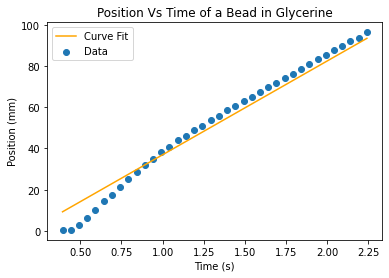

In [6]:
#plot a sample plot of the position vs time data
plt.scatter(xdata_g[13][0:38], ydata_g[13][0:38], label = "Data")
plt.plot(xdata_g[13][0:38], f(xdata_g[13][0:38], slopes[13], ints[13]), color = "orange", label = "Curve Fit")
plt.xlabel("Time (s)")
plt.ylabel("Position (mm)")
plt.title("Position Vs Time of a Bead in Glycerine")

plt.legend(loc = "best")


In [7]:
#correct the terminal velocities found above
v_corr = np.zeros(15)
for num in range(0,3):
    v_corr[num]=vcorr(slopes[num], radii_g[0], 96)
for num in range(3,6):
    v_corr[num]=vcorr(slopes[num], radii_g[1], 96)
for num in range(6,9):
    v_corr[num]=vcorr(slopes[num], radii_g[2], 96)
for num in range(9,12):
    v_corr[num]=vcorr(slopes[num], radii_g[3], 96)
for num in range(12,15):
    v_corr[num]=vcorr(slopes[num], radii_g[4], 96)

#find the average of the coreected velocities
v_mean = np.zeros(5)
v_mean[0] = np.mean(v_corr[0:3])
v_mean[1] = np.mean(v_corr[3:6])
v_mean[2] = np.mean(v_corr[6:9])
v_mean[3] = np.mean(v_corr[9:12])
v_mean[4] = np.mean(v_corr[12:15])

#calculate the error in the mean velocities
v_mean_err = np.zeros(5)
v_mean_err[0] = np.std(v_corr[0:3])/np.sqrt(3)
v_mean_err[1] = np.std(v_corr[3:6])/np.sqrt(3)
v_mean_err[2] = np.std(v_corr[6:9])/np.sqrt(3)
v_mean_err[3] = np.std(v_corr[9:12])/np.sqrt(3)
v_mean_err[4] = np.std(v_corr[12:15])/np.sqrt(3)

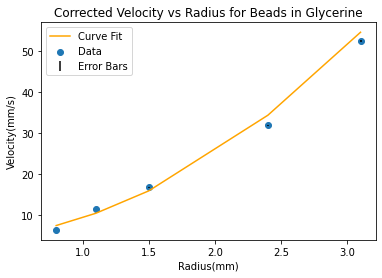

In [8]:
#plot the mean terminal velocities against radius with the curvefits and errorbars
plt.scatter(radii_g, v_mean, label = "Data")

p_optg, p_covg = curve_fit(vglycerine, radii_g, v_mean, p0 = (5,5),  sigma = v_mean_err, absolute_sigma = True)
a = p_optg[0]
b = p_optg[1]
plt.plot(radii_g, vglycerine(radii_g, a, b), color = "orange", label = "Curve Fit")

plt.title("Corrected Velocity vs Radius for Beads in Glycerine")
plt.xlabel("Radius(mm)")
plt.ylabel("Velocity(mm/s)")

plt.errorbar(radii_g, v_mean, yerr=v_mean_err, color = "black", ls="none", label = "Error Bars")

plt.legend(loc = "best")

In [9]:
#calculate the rydberg constants and errors
R = (((2*radii_g)/10)*v_mean/10)/0.01
R_err = (v_mean/10)*(2*radii_g/10)*np.sqrt(((0.1/(2*radii_g/10)**2)+((v_mean_err/(v_mean/10)**2))))


In [11]:
#calculate reuced chi-squared
chi(v_corr.size,2,v_mean,radii_g,v_mean_err,a,b)

124.71712181464899